<a href="https://colab.research.google.com/github/Alvin-Devasia/ANOVA-HHA-507/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, bartlett
import statsmodels.stats.multicomp as mc
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
from google.colab import files
uploaded = files.upload()

Saving healthinsurance.csv to healthinsurance.csv


In [42]:
df = pd.read_csv('healthinsurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
list (df)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [45]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [46]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [47]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [48]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [50]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


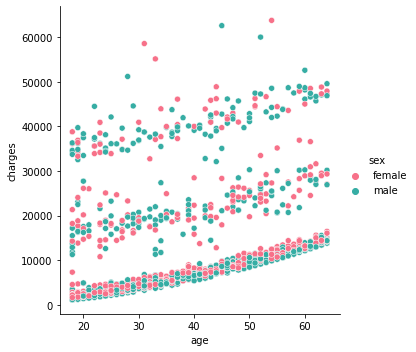

In [51]:
sns.relplot(x='age', y='charges', hue= 'sex', data=df, palette='husl')

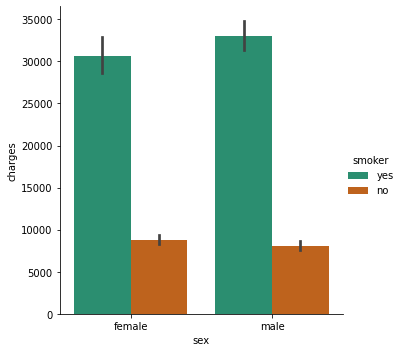

In [52]:
sns.catplot(x='sex',y='charges',hue='smoker',kind='bar',data=df, palette='Dark2')

#ANOVA

Is there a difference between insurance charges vs and individuals gender?

In [53]:
stats.f_oneway(df['charges'][df['sex'] == 'male'],                                   
               df['charges'][df['sex'] == 'female'])

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

The result above (p<0.05) indicates that there is a significant difference in charges among different genders.

Is there a difference between insurance charges vs an individuals bmi?

In [54]:
model1 = smf.ols("charges ~ C(bmi)", data = df).fit()
stats.shapiro(model1.resid)

(0.9480165243148804, 2.5141080353105238e-21)

The result above (p<0.05) indicates that there is a significant difference in insurance charges and an individuals bmi.

Is there a difference between an individuals bmi and sex?

In [55]:
model1 = smf.ols("bmi ~ C(sex)", data = df).fit()
stats.shapiro(model1.resid)

(0.994010329246521, 3.2381925848312676e-05)

The result above (p<0.05) indicates that there is a significant difference in an individuals bmi and sex.

In [36]:
comp1 = mc.MultiComparison(df['charges'], df['children'])
post_hoc_res = comp1.tukeyhsd() 
tukeyway1 = post_hoc_res.summary()

In [37]:
comp1 = mc.MultiComparison(df['charges'], df['age'])
post_hoc_res = comp1.tukeyhsd() 
tukeyway1 = post_hoc_res.summary()

In [38]:
comp1 = mc.MultiComparison(df['charges\];/.'], df['region'])
post_hoc_res = comp1.tukeyhsd() 
tukeyway1 = post_hoc_res.summary()